# Neural Network Course
## Homework 3
## Mojtaba Akbari 
### SID:4012015004

# Q1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:/Neural Networks/HW3/Student_Performance.csv')

In [3]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map(
                   {'Yes':1,'No':0})

In [4]:
for column in data.columns: 
    data[column] = data[column]  / data[column].abs().max() 

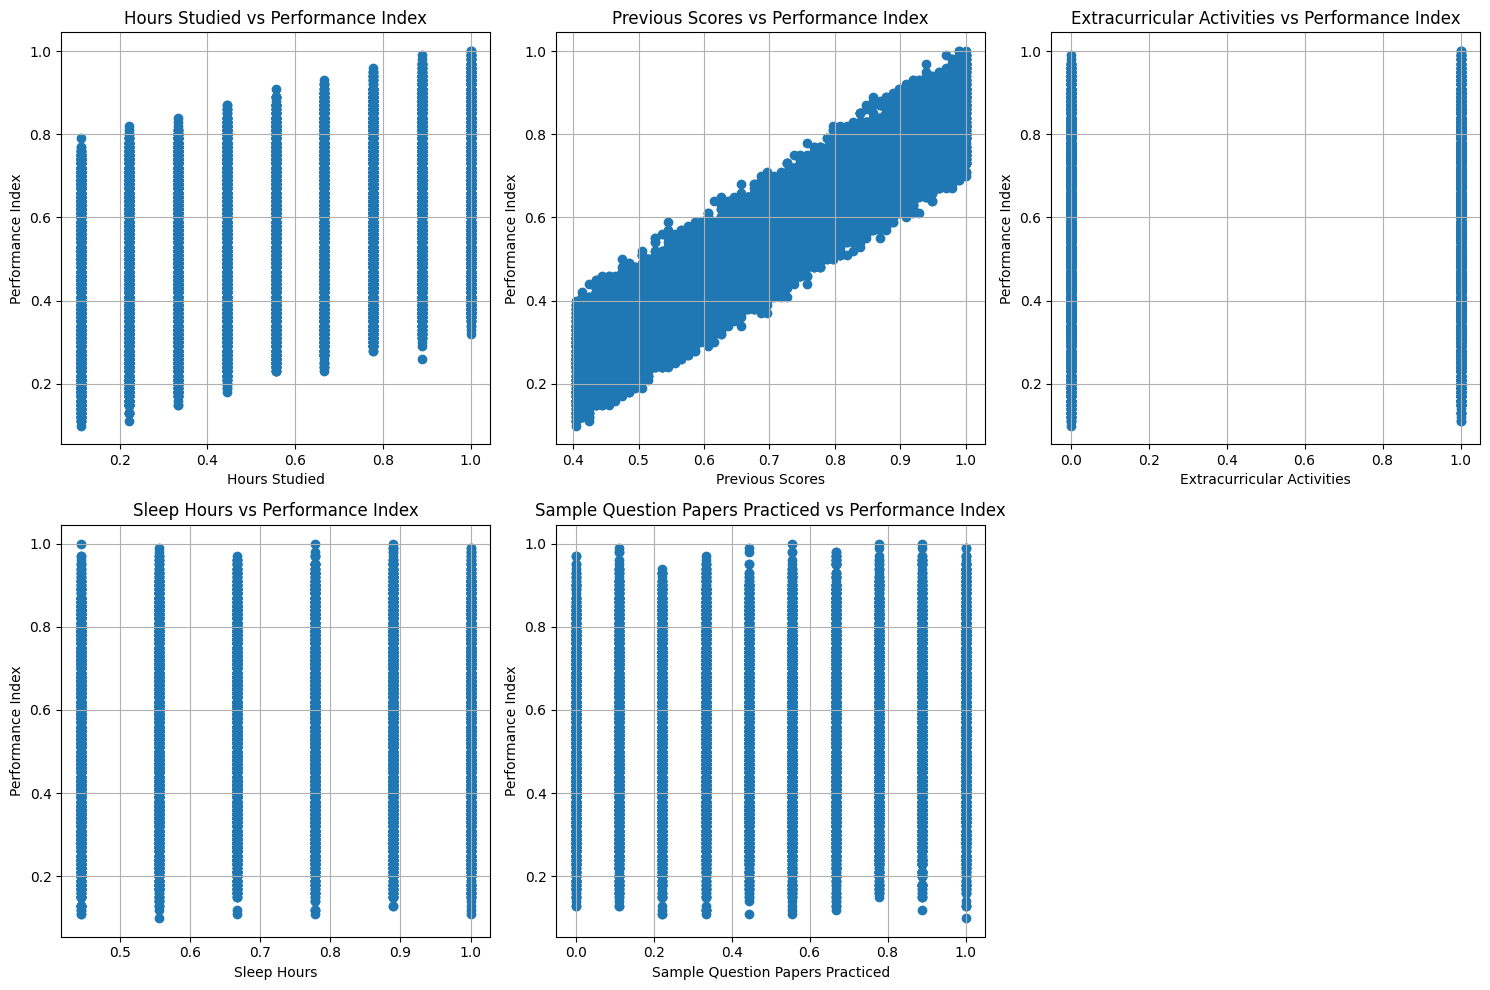

In [5]:
columns_to_plot = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  

for idx, column in enumerate(columns_to_plot):
    if idx < 5:  
        row = idx // 3  
        col = idx % 3   
        axes[row, col].scatter(data[column], data['Performance Index'])
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Performance Index')
        axes[row, col].set_title(f'{column} vs Performance Index')
        axes[row, col].grid(True)
    else:
        break  

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()


## همانطور که مشخص است نمره عملکرد فقط به دو عامل میزان ساعت مطالعه و نمره قبلی بستگی دارد. لذا برای آموزش شبکه فقط ازین دو ویژگی استفاده می کنیم.

In [6]:
features = data.iloc[:, :2]  
labels = data.iloc[:, -1]    


features_array = features.values
labels_array = labels.values

In [7]:
train_percentage = 0.8

num_train_samples = int(len(features) * train_percentage)

indices = np.arange(len(features))
np.random.shuffle(indices)

train_indices = indices[:num_train_samples]
val_indices = indices[num_train_samples:]

train_features = features_array[train_indices]
train_labels = labels_array[train_indices]
train_labels=train_labels.reshape(8000,1)
val_features = features_array[val_indices]
val_labels = labels_array[val_indices]
val_labels=val_labels.reshape(2000,1)

## 1) a) SGD

In [8]:
def initialize_parameters(layer_dims):
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    return parameters

In [9]:
def forward_propagation(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, A_prev) + b
        A = np.maximum(0, Z) 
        cache = (A_prev, Z)
        caches.append(cache)
    
    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    Z = np.dot(W, A) + b
    cache = (A, Z)
    caches.append(cache)
    
    return Z, caches

In [10]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = np.sum((AL - Y) ** 2) / (2 * m)
    return cost

In [11]:
def backward_propagation(AL, Y, caches, parameters):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    dAL = (AL - Y)
    
    A_prev, Z = caches[L - 1]
    dZ = dAL
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(parameters['W' + str(L)].T, dZ)
    grads['dW' + str(L)] = dW
    grads['db' + str(L)] = db
    
    for l in reversed(range(L - 1)):
        A_prev, Z = caches[l]
        dZ = dA_prev * (Z > 0)
        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        if l > 0:
            dA_prev = np.dot(parameters['W' + str(l + 1)].T, dZ)
        grads['dW' + str(l + 1)] = dW
        grads['db' + str(l + 1)] = db
    
    return grads

In [12]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    
    for l in range(L):
        parameters['W' + str(l + 1)] -= learning_rate * grads['dW' + str(l + 1)]
        parameters['b' + str(l + 1)] -= learning_rate * grads['db' + str(l + 1)]
    
    return parameters

In [13]:
def train_and_plot(X_train, Y_train, X_val, Y_val, layer_dims, learning_rate, epochs):
    parameters = initialize_parameters(layer_dims)
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        train_AL, train_caches = forward_propagation(X_train, parameters)
        train_cost = compute_cost(train_AL, Y_train)
        train_losses.append(train_cost)
        
        train_grads = backward_propagation(train_AL, Y_train, train_caches, parameters)
        
        parameters = update_parameters(parameters, train_grads, learning_rate)
        
        val_AL, _ = forward_propagation(X_val, parameters)
        val_cost = compute_cost(val_AL, Y_val)
        val_losses.append(val_cost)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_cost}, Validation Loss = {val_cost}")
    
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss SGD')
    plt.legend()
    plt.show()

In [14]:
layer_dims = [2, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1]  

Epoch 0: Train Loss = 0.1707030875, Validation Loss = 0.16885930095126164
Epoch 10: Train Loss = 0.14298606165576813, Validation Loss = 0.141549514191149
Epoch 20: Train Loss = 0.1203170490132639, Validation Loss = 0.11920108869664817
Epoch 30: Train Loss = 0.10177666079420139, Validation Loss = 0.10091160173433375
Epoch 40: Train Loss = 0.08661296065287313, Validation Loss = 0.08594289024488834
Epoch 50: Train Loss = 0.07421096882547541, Validation Loss = 0.07369113521153728
Epoch 60: Train Loss = 0.06406771269153273, Validation Loss = 0.06366239827184843
Epoch 70: Train Loss = 0.055771824256958084, Validation Loss = 0.05545261562930389
Epoch 80: Train Loss = 0.04898685516153849, Validation Loss = 0.04873123634320253
Epoch 90: Train Loss = 0.04343763138897334, Validation Loss = 0.04322784061651607


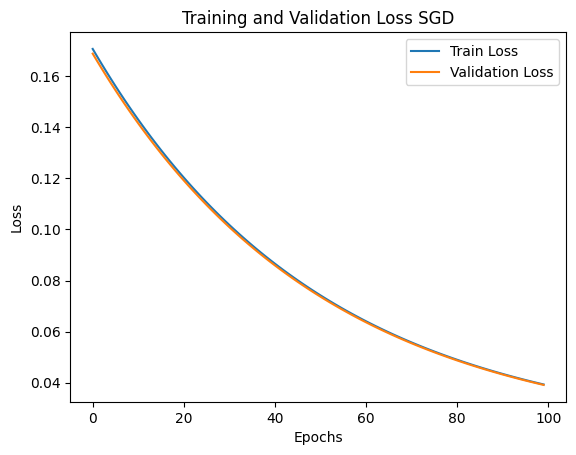

In [15]:
train_and_plot(train_features.T, train_labels.T, val_features.T, val_labels.T, layer_dims, learning_rate=0.01, epochs=100)

# 

# 

# 1) b) Dropout=0.2

###### 

In [16]:
def forward_propagation_with_dropout(X, parameters, keep_prob=1):
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, A_prev) + b
        A = np.maximum(0, Z)  
        
        D = np.random.rand(A.shape[0], A.shape[1])
        D = (D < keep_prob).astype(int)
        A *= D
        A /= keep_prob
        
        cache = (A_prev, Z, D)
        caches.append(cache)
    
    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    Z = np.dot(W, A) + b
    cache = (A, Z)
    caches.append(cache)
    
    return Z, caches

In [17]:
def backward_propagation_with_dropout(AL, Y, caches, parameters, keep_prob=1):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    dAL = (AL - Y)
    
    A_prev, Z = caches[L - 1]
    grads['dW' + str(L)] = np.dot(dAL, A_prev.T) / m
    grads['db' + str(L)] = np.sum(dAL, axis=1, keepdims=True) / m
    
    dA = np.dot(parameters['W' + str(L)].T, dAL)
    for l in reversed(range(L - 1)):
        A_prev, Z, D = caches[l]
        dA *= D
        dA /= keep_prob
        dZ = dA * (Z > 0)
        grads['dW' + str(l + 1)] = np.dot(dZ, A_prev.T) / m
        grads['db' + str(l + 1)] = np.sum(dZ, axis=1, keepdims=True) / m
        dA = np.dot(parameters['W' + str(l + 1)].T, dZ)
    
    return grads

In [18]:
def train_and_plot_with_dropout(X_train, Y_train, X_val, Y_val, layer_dims, learning_rate, epochs, keep_prob):
    parameters = initialize_parameters(layer_dims)
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        train_AL, train_caches = forward_propagation_with_dropout(X_train, parameters, keep_prob)
        train_cost = compute_cost(train_AL, Y_train)
        train_losses.append(train_cost)
        
        train_grads = backward_propagation_with_dropout(train_AL, Y_train, train_caches, parameters, keep_prob)
        
        parameters = update_parameters(parameters, train_grads, learning_rate)
        
        val_AL, _ = forward_propagation(X_val, parameters)
        val_cost = compute_cost(val_AL, Y_val)
        val_losses.append(val_cost)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_cost}, Validation Loss = {val_cost}")
    
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss with Dropout')
    plt.legend()
    plt.show()

Epoch 0: Train Loss = 0.1707030875, Validation Loss = 0.16885937027785428
Epoch 10: Train Loss = 0.14297610869804458, Validation Loss = 0.14153865121517173
Epoch 20: Train Loss = 0.12029981205662585, Validation Loss = 0.11918315838277595
Epoch 30: Train Loss = 0.10175481440753208, Validation Loss = 0.10088940947345802
Epoch 40: Train Loss = 0.0865886571938668, Validation Loss = 0.08591843189899279
Epoch 50: Train Loss = 0.07418580801469103, Validation Loss = 0.07366582838771604
Epoch 60: Train Loss = 0.064042506909153, Validation Loss = 0.06363724542173875
Epoch 70: Train Loss = 0.055747339717705444, Validation Loss = 0.05542829162702087
Epoch 80: Train Loss = 0.04896390690419616, Validation Loss = 0.04870818255895071
Epoch 90: Train Loss = 0.04341610729429122, Validation Loss = 0.04320632678355004


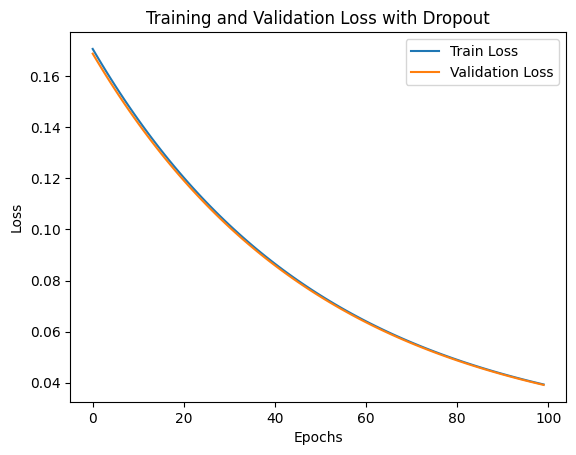

In [19]:
train_and_plot_with_dropout(train_features.T, train_labels.T, val_features.T, val_labels.T, layer_dims, learning_rate=0.01, epochs=100, keep_prob=0.8)

# 

# 

# 1) c) Variable Learning Rate in BackPropagation

### 

In [20]:
def forward_propagation(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, A_prev) + b
        A = np.maximum(0, Z)  
        cache = (A_prev, Z)
        caches.append(cache)
    
    W = parameters['W' + str(L)]
    b = parameters['b' + str(L)]
    Z = np.dot(W, A) + b
    cache = (A, Z)
    caches.append(cache)
    
    return Z, caches

In [21]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = np.sum((AL - Y) ** 2) / (2 * m)
    return cost

def backward_propagation(AL, Y, caches, parameters):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    dAL = (AL - Y)
    
    A_prev, Z = caches[L - 1]
    grads['dW' + str(L)] = np.dot(dAL, A_prev.T) / m
    grads['db' + str(L)] = np.sum(dAL, axis=1, keepdims=True) / m
    
    dA = np.dot(parameters['W' + str(L)].T, dAL)
    for l in reversed(range(L - 1)):
        A_prev, Z = caches[l]
        dZ = dA * (Z > 0)
        grads['dW' + str(l + 1)] = np.dot(dZ, A_prev.T) / m
        grads['db' + str(l + 1)] = np.sum(dZ, axis=1, keepdims=True) / m
        dA = np.dot(parameters['W' + str(l + 1)].T, dZ)
    
    return grads

In [22]:
def update_parameters(parameters, grads, learning_rate, epsilon=1e-8):
    L = len(parameters) // 2
    cache = {}
    
    for l in range(L):
        cache['dW' + str(l + 1)] = np.zeros_like(grads['dW' + str(l + 1)])
        cache['db' + str(l + 1)] = np.zeros_like(grads['db' + str(l + 1)])
        
        cache['dW' + str(l + 1)] += grads['dW' + str(l + 1)] ** 2
        cache['db' + str(l + 1)] += grads['db' + str(l + 1)] ** 2
        
        parameters['W' + str(l + 1)] -= learning_rate * grads['dW' + str(l + 1)] / (np.sqrt(cache['dW' + str(l + 1)]) + epsilon)
        parameters['b' + str(l + 1)] -= learning_rate * grads['db' + str(l + 1)] / (np.sqrt(cache['db' + str(l + 1)]) + epsilon)
    
    return parameters

In [23]:
def train_and_plot(X_train, Y_train, X_val, Y_val, layer_dims, learning_rate, epochs):
    parameters = initialize_parameters(layer_dims)
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        train_AL, train_caches = forward_propagation(X_train, parameters)
        train_cost = compute_cost(train_AL, Y_train)
        train_losses.append(train_cost)
        
        train_grads = backward_propagation(train_AL, Y_train, train_caches, parameters)
        
        parameters = update_parameters(parameters, train_grads, learning_rate)
        
        val_AL, _ = forward_propagation(X_val, parameters)
        val_cost = compute_cost(val_AL, Y_val)
        val_losses.append(val_cost)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_cost}, Validation Loss = {val_cost}")
    
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss with VLBP')
    plt.legend()
    plt.show()

Epoch 0: Train Loss = 0.1707030875, Validation Loss = 0.16913101403680356
Epoch 10: Train Loss = 0.1396302715372562, Validation Loss = 0.1370381661702416
Epoch 20: Train Loss = 0.09786174994937478, Validation Loss = 0.0936871681129139
Epoch 30: Train Loss = 0.04528100904718649, Validation Loss = 0.040463401278348174
Epoch 40: Train Loss = 0.018527829393853352, Validation Loss = 0.018822314796547127
Epoch 50: Train Loss = 0.018527850392242678, Validation Loss = 0.0188221537834645
Epoch 60: Train Loss = 0.018527871385871798, Validation Loss = 0.018821993024932388
Epoch 70: Train Loss = 0.018527892374746446, Validation Loss = 0.018821832519953067
Epoch 80: Train Loss = 0.01852791335887232, Validation Loss = 0.01882167226753531
Epoch 90: Train Loss = 0.018527934338255107, Validation Loss = 0.018821512266694342


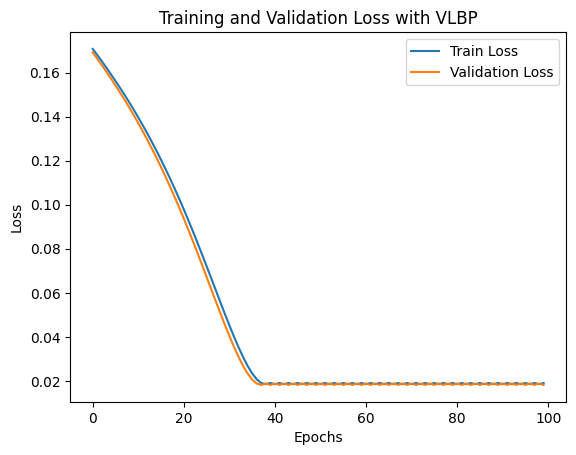

In [24]:
train_and_plot(train_features.T, train_labels.T, val_features.T, val_labels.T, layer_dims, learning_rate=0.005, epochs=100)

# 

# 1) d) Momentum SGD

### 

In [25]:
def update_parameters(parameters, grads, learning_rate, beta=0.9):
    L = len(parameters) // 2
    v = {}
    
    for l in range(L):
        v['dW' + str(l + 1)] = np.zeros_like(grads['dW' + str(l + 1)])
        v['db' + str(l + 1)] = np.zeros_like(grads['db' + str(l + 1)])
        
        v['dW' + str(l + 1)] = beta * v['dW' + str(l + 1)] + (1 - beta) * grads['dW' + str(l + 1)]
        v['db' + str(l + 1)] = beta * v['db' + str(l + 1)] + (1 - beta) * grads['db' + str(l + 1)]
        
        parameters['W' + str(l + 1)] -= learning_rate * v['dW' + str(l + 1)]
        parameters['b' + str(l + 1)] -= learning_rate * v['db' + str(l + 1)]
    
    return parameters

In [26]:
def train_and_plot(X_train, Y_train, X_val, Y_val, layer_dims, learning_rate, epochs):
    parameters = initialize_parameters(layer_dims)
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        train_AL, train_caches = forward_propagation(X_train, parameters)
        train_cost = compute_cost(train_AL, Y_train)
        train_losses.append(train_cost)
        
        train_grads = backward_propagation(train_AL, Y_train, train_caches, parameters)
        
        parameters = update_parameters(parameters, train_grads, learning_rate)
        
        val_AL, _ = forward_propagation(X_val, parameters)
        val_cost = compute_cost(val_AL, Y_val)
        val_losses.append(val_cost)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_cost}, Validation Loss = {val_cost}")
    
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss with Momentum SGD')
    plt.legend()
    plt.show()

Epoch 0: Train Loss = 0.1707030875, Validation Loss = 0.16946592757415999
Epoch 10: Train Loss = 0.14811561180022614, Validation Loss = 0.14712164499161223
Epoch 20: Train Loss = 0.1288806092236612, Validation Loss = 0.12808541884756575
Epoch 30: Train Loss = 0.11250049108573416, Validation Loss = 0.11186689569736946
Epoch 40: Train Loss = 0.09855152799833387, Validation Loss = 0.09804845778342647
Epoch 50: Train Loss = 0.08667288470728272, Validation Loss = 0.08627442842958004
Epoch 60: Train Loss = 0.07655728342498556, Validation Loss = 0.0762418804407107
Epoch 70: Train Loss = 0.06794305364926391, Validation Loss = 0.0676928091554195
Epoch 80: Train Loss = 0.0606073624271075, Validation Loss = 0.06040746738215698
Epoch 90: Train Loss = 0.05436044969000657, Validation Loss = 0.05419868962645914


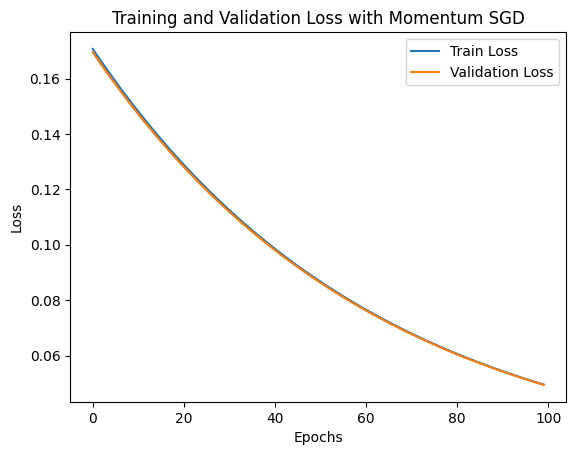

In [27]:
train_and_plot(train_features.T, train_labels.T, val_features.T, val_labels.T, layer_dims, learning_rate=0.08, epochs=100)

# 

# E) RMS Prop

##### 

In [28]:
def update_parameters(parameters, grads, learning_rate, beta=0.9, epsilon=1e-8):
    L = len(parameters) // 2
    s = {}
    
    for l in range(L):
        s['dW' + str(l + 1)] = np.zeros_like(grads['dW' + str(l + 1)])
        s['db' + str(l + 1)] = np.zeros_like(grads['db' + str(l + 1)])
        
        s['dW' + str(l + 1)] = beta * s['dW' + str(l + 1)] + (1 - beta) * (grads['dW' + str(l + 1)] ** 2)
        s['db' + str(l + 1)] = beta * s['db' + str(l + 1)] + (1 - beta) * (grads['db' + str(l + 1)] ** 2)
        
        parameters['W' + str(l + 1)] -= learning_rate * grads['dW' + str(l + 1)] / (np.sqrt(s['dW' + str(l + 1)]) + epsilon)
        parameters['b' + str(l + 1)] -= learning_rate * grads['db' + str(l + 1)] / (np.sqrt(s['db' + str(l + 1)]) + epsilon)
    
    return parameters

In [29]:
def train_and_plot(X_train, Y_train, X_val, Y_val, layer_dims, learning_rate, epochs):
    parameters = initialize_parameters(layer_dims)
    train_losses = []
    val_losses = []
    
    for epoch in range(epochs):
        train_AL, train_caches = forward_propagation(X_train, parameters)
        train_cost = compute_cost(train_AL, Y_train)
        train_losses.append(train_cost)
        
        train_grads = backward_propagation(train_AL, Y_train, train_caches, parameters)
        
        parameters = update_parameters(parameters, train_grads, learning_rate)
        
        val_AL, _ = forward_propagation(X_val, parameters)
        val_cost = compute_cost(val_AL, Y_val)
        val_losses.append(val_cost)
        
        # Print cost every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_cost}, Validation Loss = {val_cost}")
    
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss with RMS Prop')
    plt.legend()
    plt.show()

Epoch 0: Train Loss = 0.1707030875, Validation Loss = 0.16890473784223284
Epoch 10: Train Loss = 0.13596443809788897, Validation Loss = 0.13284088755312856
Epoch 20: Train Loss = 0.0888658649886912, Validation Loss = 0.08410772998745977
Epoch 30: Train Loss = 0.03326885617329523, Validation Loss = 0.028684389580579683
Epoch 40: Train Loss = 0.0191837041450488, Validation Loss = 0.01817072738929524
Epoch 50: Train Loss = 0.019019983255795514, Validation Loss = 0.018108311156713634
Epoch 60: Train Loss = 0.018684084551885437, Validation Loss = 0.01798624347003018
Epoch 70: Train Loss = 0.01816968338250534, Validation Loss = 0.017865282647438974
Epoch 80: Train Loss = 0.017886049264748977, Validation Loss = 0.017821745585075186
Epoch 90: Train Loss = 0.01778993271493886, Validation Loss = 0.017801460863709942


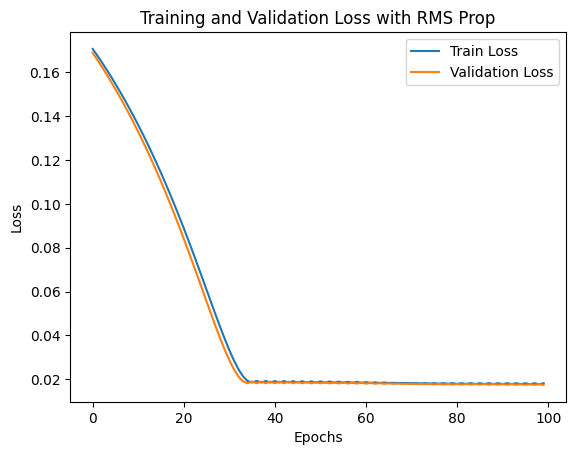

In [30]:
train_and_plot(train_features.T, train_labels.T, val_features.T, val_labels.T, layer_dims, learning_rate=0.0017, epochs=100)

# 

# 1) F) Adam

##### 

In [31]:
t=0

In [32]:
def update_parameters(parameters, grads, learning_rate, t, beta1=0.9, beta2=0.999, epsilon=1e-8):
    L = len(parameters) // 2
    v_corrected = {}
    s_corrected = {}
    
    for l in range(L):
        v_corrected['dW' + str(l + 1)] = np.zeros_like(grads['dW' + str(l + 1)])
        v_corrected['db' + str(l + 1)] = np.zeros_like(grads['db' + str(l + 1)])
        s_corrected['dW' + str(l + 1)] = np.zeros_like(grads['dW' + str(l + 1)])
        s_corrected['db' + str(l + 1)] = np.zeros_like(grads['db' + str(l + 1)])
        
        v_corrected['dW' + str(l + 1)] = beta1 * v_corrected['dW' + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
        v_corrected['db' + str(l + 1)] = beta1 * v_corrected['db' + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]
        
        s_corrected['dW' + str(l + 1)] = beta2 * s_corrected['dW' + str(l + 1)] + (1 - beta2) * (grads['dW' + str(l + 1)] ** 2)
        s_corrected['db' + str(l + 1)] = beta2 * s_corrected['db' + str(l + 1)] + (1 - beta2) * (grads['db' + str(l + 1)] ** 2)
        
        v_corrected['dW' + str(l + 1)] /= (1 - beta1 ** t)
        v_corrected['db' + str(l + 1)] /= (1 - beta1 ** t)
        
        s_corrected['dW' + str(l + 1)] /= (1 - beta2 ** t)
        s_corrected['db' + str(l + 1)] /= (1 - beta2 ** t)
        
        parameters['W' + str(l + 1)] -= learning_rate * v_corrected['dW' + str(l + 1)] / (np.sqrt(s_corrected['dW' + str(l + 1)]) + epsilon)
        parameters['b' + str(l + 1)] -= learning_rate * v_corrected['db' + str(l + 1)] / (np.sqrt(s_corrected['db' + str(l + 1)]) + epsilon)
    
    return parameters

In [33]:
def train_and_plot(X_train, Y_train, X_val, Y_val, layer_dims, learning_rate, epochs):
    parameters = initialize_parameters(layer_dims)
    train_losses = []
    val_losses = []
    t = 0
    
    for epoch in range(epochs):
        train_AL, train_caches = forward_propagation(X_train, parameters)
        train_cost = compute_cost(train_AL, Y_train)
        train_losses.append(train_cost)
        
        train_grads = backward_propagation(train_AL, Y_train, train_caches, parameters)
        
        t += 1 
        parameters = update_parameters(parameters, train_grads, learning_rate, t)
        
        val_AL, _ = forward_propagation(X_val, parameters)
        val_cost = compute_cost(val_AL, Y_val)
        val_losses.append(val_cost)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_cost}, Validation Loss = {val_cost}")
    
    # Plotting the training and validation losses
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss with Adam Optimizer')
    plt.legend()
    plt.show()

Epoch 0: Train Loss = 0.1707030875, Validation Loss = 0.16600897971511416
Epoch 10: Train Loss = 0.12240085235160433, Validation Loss = 0.11812444521691703
Epoch 20: Train Loss = 0.06359537823583238, Validation Loss = 0.05759159004126016
Epoch 30: Train Loss = 0.018877111336232915, Validation Loss = 0.01845042272727234
Epoch 40: Train Loss = 0.018957934754391056, Validation Loss = 0.018512158864985587
Epoch 50: Train Loss = 0.01904487716259534, Validation Loss = 0.01857388920013586
Epoch 60: Train Loss = 0.019134551518547448, Validation Loss = 0.018631694804521936
Epoch 70: Train Loss = 0.019225937872484174, Validation Loss = 0.01868835065139978
Epoch 80: Train Loss = 0.019318217824037105, Validation Loss = 0.018748498543649638
Epoch 90: Train Loss = 0.019410708965181274, Validation Loss = 0.018809534203634758


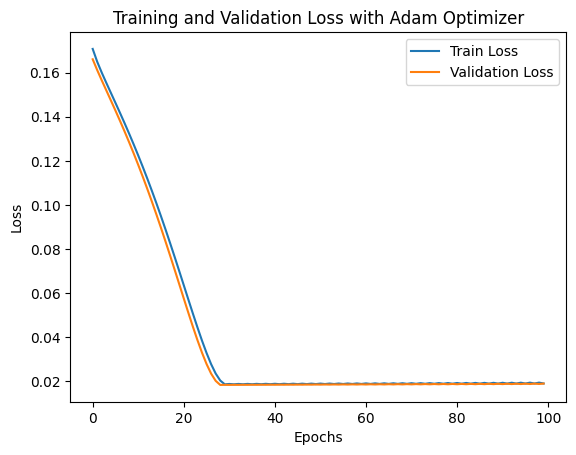

In [34]:
train_and_plot(train_features.T, train_labels.T, val_features.T, val_labels.T, layer_dims, learning_rate=0.01, epochs=100)

# 

# Q2)

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

In [36]:
class NeuralNetwork(nn.Module):
    def __init__(self, use_dropout=False, use_batchnorm=False):
        super(NeuralNetwork, self).__init__()
        self.use_dropout = use_dropout
        self.use_batchnorm = use_batchnorm
        
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 256)
        self.layer3 = nn.Linear(256, 128)
        self.layer4 = nn.Linear(128, 64)
        self.layer5 = nn.Linear(64, 32)
        self.layer6 = nn.Linear(32, 16)
        self.layer7 = nn.Linear(16, 10)
        
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.batchnorm = nn.BatchNorm1d(128)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        
        if self.use_batchnorm:
            x = self.batchnorm(x)
        
        x = self.activation(self.layer4(x))
        x = self.activation(self.layer5(x))
        x = self.activation(self.layer6(x))
        
        if self.use_dropout:
            x = self.dropout(x)
        
        x = self.layer7(x)
        return x

In [37]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST('mnist_data/', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('mnist_data/', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

Training on cuda


In [39]:
model = NeuralNetwork(use_dropout=True).to(device)

In [40]:
def train_model(model, criterion, optimizer, epochs=20):
    model.to(device)  
    train_losses = []
    test_losses = []
    train_accuracy = []
    test_accuracy = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device) 
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
        
        train_accuracy.append(correct_train / total_train)
        train_losses.append(running_loss / len(train_loader))
        
        test_loss = 0.0
        correct_test = 0
        total_test = 0
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)  
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()
        
        test_accuracy.append(correct_test / total_test)
        test_losses.append(test_loss / len(test_loader))
        
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {train_losses[-1]:.4f}, "
              f"Train Accuracy: {train_accuracy[-1]*100:.2f}%, "
              f"Test Loss: {test_losses[-1]:.4f}, "
              f"Test Accuracy: {test_accuracy[-1]*100:.2f}%")
    
    return train_losses, test_losses, train_accuracy, test_accuracy

# SGD as optimizer

In [44]:
model_sgd = NeuralNetwork(use_dropout=False).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)

sgd_train_losses, sgd_test_losses, sgd_train_accuracy, sgd_test_accuracy = train_model(model_sgd, criterion, optimizer_sgd)

Epoch [1/20], Train Loss: 2.3077, Train Accuracy: 9.87%, Test Loss: 2.3012, Test Accuracy: 9.80%
Epoch [2/20], Train Loss: 2.2988, Train Accuracy: 11.02%, Test Loss: 2.2953, Test Accuracy: 11.35%
Epoch [3/20], Train Loss: 2.2752, Train Accuracy: 15.75%, Test Loss: 2.1993, Test Accuracy: 21.06%
Epoch [4/20], Train Loss: 1.8310, Train Accuracy: 26.22%, Test Loss: 1.7114, Test Accuracy: 30.70%
Epoch [5/20], Train Loss: 1.4762, Train Accuracy: 41.44%, Test Loss: 1.2476, Test Accuracy: 50.72%
Epoch [6/20], Train Loss: 0.9307, Train Accuracy: 67.01%, Test Loss: 0.6567, Test Accuracy: 78.44%
Epoch [7/20], Train Loss: 0.5137, Train Accuracy: 84.24%, Test Loss: 0.3599, Test Accuracy: 89.84%
Epoch [8/20], Train Loss: 0.3338, Train Accuracy: 90.37%, Test Loss: 0.3458, Test Accuracy: 89.70%
Epoch [9/20], Train Loss: 0.2609, Train Accuracy: 92.35%, Test Loss: 0.2640, Test Accuracy: 92.19%
Epoch [10/20], Train Loss: 0.2151, Train Accuracy: 93.75%, Test Loss: 0.1868, Test Accuracy: 94.59%
Epoch [11/2

## SGD with 0.2 Dropout

In [45]:
model_sgd = NeuralNetwork(use_dropout=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)

sgd_train_losses_d, sgd_test_losses_d, sgd_train_accuracy_d, sgd_test_accuracy_d = train_model(model_sgd, criterion, optimizer_sgd)


Epoch [1/20], Train Loss: 2.3028, Train Accuracy: 11.24%, Test Loss: 2.2996, Test Accuracy: 11.35%
Epoch [2/20], Train Loss: 2.2964, Train Accuracy: 11.24%, Test Loss: 2.2895, Test Accuracy: 11.35%
Epoch [3/20], Train Loss: 2.2151, Train Accuracy: 16.02%, Test Loss: 1.9323, Test Accuracy: 27.19%
Epoch [4/20], Train Loss: 1.4970, Train Accuracy: 43.06%, Test Loss: 1.3677, Test Accuracy: 46.84%
Epoch [5/20], Train Loss: 1.1284, Train Accuracy: 59.58%, Test Loss: 1.0064, Test Accuracy: 63.27%
Epoch [6/20], Train Loss: 0.8572, Train Accuracy: 70.63%, Test Loss: 0.8176, Test Accuracy: 71.62%
Epoch [7/20], Train Loss: 0.6820, Train Accuracy: 78.55%, Test Loss: 0.7094, Test Accuracy: 76.56%
Epoch [8/20], Train Loss: 0.5503, Train Accuracy: 83.44%, Test Loss: 0.4795, Test Accuracy: 86.04%
Epoch [9/20], Train Loss: 0.4734, Train Accuracy: 86.22%, Test Loss: 0.4422, Test Accuracy: 87.56%
Epoch [10/20], Train Loss: 0.4243, Train Accuracy: 87.75%, Test Loss: 0.4124, Test Accuracy: 88.39%
Epoch [11

# RMS Prop 

In [46]:
model_rmsprop = NeuralNetwork(use_dropout=False).to(device)
optimizer_rmsprop = optim.RMSprop(model_rmsprop.parameters(), lr=0.001)

rmsprop_train_losses, rmsprop_test_losses, rmsprop_train_accuracy, rmsprop_test_accuracy = train_model(model_rmsprop, criterion, optimizer_rmsprop)

Epoch [1/20], Train Loss: 0.5914, Train Accuracy: 80.67%, Test Loss: 0.2667, Test Accuracy: 91.94%
Epoch [2/20], Train Loss: 0.2203, Train Accuracy: 93.51%, Test Loss: 0.1795, Test Accuracy: 94.61%
Epoch [3/20], Train Loss: 0.1681, Train Accuracy: 95.07%, Test Loss: 0.1515, Test Accuracy: 95.47%
Epoch [4/20], Train Loss: 0.1367, Train Accuracy: 95.95%, Test Loss: 0.1335, Test Accuracy: 96.27%
Epoch [5/20], Train Loss: 0.1166, Train Accuracy: 96.55%, Test Loss: 0.1252, Test Accuracy: 96.16%
Epoch [6/20], Train Loss: 0.1019, Train Accuracy: 96.91%, Test Loss: 0.1326, Test Accuracy: 96.35%
Epoch [7/20], Train Loss: 0.0911, Train Accuracy: 97.30%, Test Loss: 0.1468, Test Accuracy: 95.80%
Epoch [8/20], Train Loss: 0.0834, Train Accuracy: 97.48%, Test Loss: 0.0943, Test Accuracy: 97.23%
Epoch [9/20], Train Loss: 0.0739, Train Accuracy: 97.78%, Test Loss: 0.1336, Test Accuracy: 96.23%
Epoch [10/20], Train Loss: 0.0695, Train Accuracy: 97.88%, Test Loss: 0.1023, Test Accuracy: 97.15%
Epoch [11

# Adam

In [47]:
model_adam = NeuralNetwork(use_dropout=False).to(device)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.001)

adam_train_losses, adam_test_losses, adam_train_accuracy, adam_test_accuracy = train_model(model_adam, criterion, optimizer_adam)

Epoch [1/20], Train Loss: 0.6254, Train Accuracy: 79.51%, Test Loss: 0.2695, Test Accuracy: 91.89%
Epoch [2/20], Train Loss: 0.2351, Train Accuracy: 93.08%, Test Loss: 0.1962, Test Accuracy: 94.24%
Epoch [3/20], Train Loss: 0.1707, Train Accuracy: 94.95%, Test Loss: 0.1799, Test Accuracy: 94.62%
Epoch [4/20], Train Loss: 0.1414, Train Accuracy: 95.79%, Test Loss: 0.1469, Test Accuracy: 95.87%
Epoch [5/20], Train Loss: 0.1187, Train Accuracy: 96.42%, Test Loss: 0.1333, Test Accuracy: 96.10%
Epoch [6/20], Train Loss: 0.1073, Train Accuracy: 96.74%, Test Loss: 0.1259, Test Accuracy: 96.30%
Epoch [7/20], Train Loss: 0.0938, Train Accuracy: 97.14%, Test Loss: 0.1165, Test Accuracy: 96.82%
Epoch [8/20], Train Loss: 0.0873, Train Accuracy: 97.38%, Test Loss: 0.1092, Test Accuracy: 96.91%
Epoch [9/20], Train Loss: 0.0770, Train Accuracy: 97.67%, Test Loss: 0.1079, Test Accuracy: 97.14%
Epoch [10/20], Train Loss: 0.0723, Train Accuracy: 97.81%, Test Loss: 0.1007, Test Accuracy: 97.20%
Epoch [11

# Batch Normalization

In [48]:
model_batchnorm = NeuralNetwork(use_dropout=False, use_batchnorm=True).to(device)
optimizer_batchnorm = optim.Adam(model_batchnorm.parameters(), lr=0.001)

batchnorm_train_losses, batchnorm_test_losses, batchnorm_train_accuracy, batchnorm_test_accuracy = train_model(model_batchnorm, criterion, optimizer_batchnorm)

Epoch [1/20], Train Loss: 0.4524, Train Accuracy: 86.51%, Test Loss: 0.2177, Test Accuracy: 93.38%
Epoch [2/20], Train Loss: 0.2152, Train Accuracy: 93.49%, Test Loss: 0.1814, Test Accuracy: 94.42%
Epoch [3/20], Train Loss: 0.1771, Train Accuracy: 94.62%, Test Loss: 0.1675, Test Accuracy: 94.95%
Epoch [4/20], Train Loss: 0.1561, Train Accuracy: 95.09%, Test Loss: 0.1545, Test Accuracy: 95.58%
Epoch [5/20], Train Loss: 0.1443, Train Accuracy: 95.50%, Test Loss: 0.1533, Test Accuracy: 95.40%
Epoch [6/20], Train Loss: 0.1315, Train Accuracy: 95.89%, Test Loss: 0.1355, Test Accuracy: 95.99%
Epoch [7/20], Train Loss: 0.1259, Train Accuracy: 96.00%, Test Loss: 0.1357, Test Accuracy: 95.85%
Epoch [8/20], Train Loss: 0.1177, Train Accuracy: 96.38%, Test Loss: 0.1292, Test Accuracy: 96.29%
Epoch [9/20], Train Loss: 0.1127, Train Accuracy: 96.40%, Test Loss: 0.1366, Test Accuracy: 95.83%
Epoch [10/20], Train Loss: 0.1067, Train Accuracy: 96.58%, Test Loss: 0.1337, Test Accuracy: 95.86%
Epoch [11

# Accuracy vs Epochs & Loss vs Epochs

In [49]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

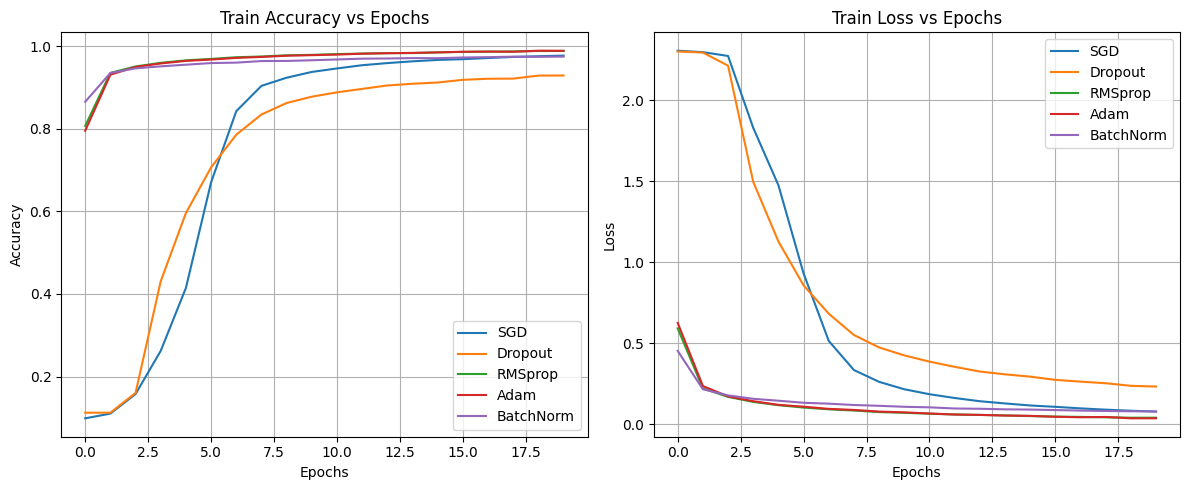

In [53]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sgd_train_accuracy, label='SGD')
plt.plot(sgd_train_accuracy_d, label='Dropout')
plt.plot(rmsprop_train_accuracy, label='RMSprop')
plt.plot(adam_train_accuracy, label='Adam')
plt.plot(batchnorm_train_accuracy, label='BatchNorm')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Accuracy vs Epochs')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sgd_train_losses, label='SGD')
plt.plot(sgd_train_losses_d, label='Dropout')
plt.plot(rmsprop_train_losses, label='RMSprop')
plt.plot(adam_train_losses, label='Adam')
plt.plot(batchnorm_train_losses, label='BatchNorm')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## <p dir=rtl> طبق نمودار بهترین حالت مربوط به استفاده از بهینه ساز Adam است

## <p dir=rtl> در شبکه طراحی شده عملکرد بهینه ساز SGD در ابتدا نسبت به سایر بهینه سازها ضعیف تر بوده اما در پایان آموزش همه بهینه ساز ها عملکرد و دقت بسیار مشابهی به هم داشته اند. همچنین بهینه ساز Adam با اختلاف کمی نسبت به سایر بهینه سازها بهتر عمل کرده است.  